# Correlation Test  

* Korelasi tidak berarti kausasi (jika a berkorelasi dengan b, tidakk berarti a menyebabkan b)  
* 2 tipe uji korelasi:
    * Pearson: hubungan linear, parametrik, data numerik
    * Spearman: hubungan monotonik (tidak selalu linear), non parametrik, bisa pakai data ordinal(qualitatif)
* Hasil uji korelasi bernilai di antara -1 sampai 1
    * positif/ negatif merupakan arah hubungan
        * positif: A berbanding lurus dengan B
        * negatif: A berbanding terbalik dengan B
    * Nilai absolut dari nilai korelasi menunjukkan kekuatan hubungan:
        * 0-0.3: korelasi lemah
        * 0.3-0.7: korelasi sedang
        * 0.7-1: korelasi kuat
        * range bisa berubah tergantung domain riset

In [1]:
#libraries

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
# dataset
df=pd.read_csv('bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.corr()
# pandas memiliki fungsi .corr() untuk mencari nilai korelasi antar variabel

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


In [6]:
df[['Reviews','Price','Year']].corr()

,Reviews,Price,Year
Reviews,1.000000,-0.109182,0.263560
Price,-0.109182,1.000000,-0.153979
Year,0.263560,-0.153979,1.000000


In [9]:
df['Reviews'].corr(df['User Rating'])

-0.0017290142555501094

## Apakah User Rating Memiliki Korelasi dengan Reviews?

Sebelum uji korelasi
* uji distribusi
* lihat tipe hubungan antar variabel

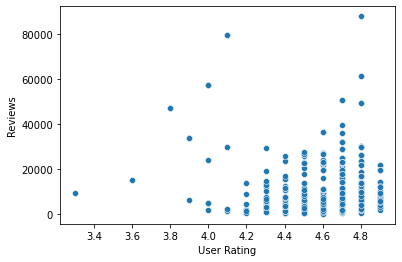

In [12]:
sns.scatterplot(x=df['User Rating'],y=df['Reviews'])

In [14]:
# kalau dilihat dari scatterplot, hubungan antara user rating dan reviews tidak linear
# jadi, kita gunakan metode korelasi spearman

df[['User Rating','Reviews']].corr(method='spearman') #parameter method untuk memilih metode korelasi yang dipakai
# default method adalah pearson

,User Rating,Reviews
User Rating,1.000000,0.200458
Reviews,0.200458,1.000000


Nilai korelasi antara `user rating` dan `reviews` adalah 0.20.    
* nilai positif: hubungan antara kedua variabel berbanding lurus, artinya, semakin besar nilai `user rating`, semakin besar juga nilai `reviews`  
* nilai korelasi 0.20 menunjukkan kekuatan hubungan; `user rating` memiliki hubungan korelasi yang lemah dengan `reviews`.

## Apakah Rating Berkorelasi dengan Price?

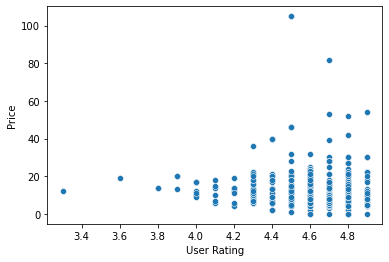

In [15]:
sns.scatterplot(x=df['User Rating'],y=df['Price'])

In [17]:
# terlihat tidak linear
# pakai spearman

df['User Rating'].corr(df['Price'], method='spearman')

-0.23106979558156984

Nilai korelasi antara `User Rating` dan `Price` adalah -0.23, artinya:
* nilai negatif menunjukan arah hubungan negatif, atau berbanding terbalik. Artinya, semakin besar nilai `price`, semakin kecil nilai `user rating`, atau sebaliknya.
* angka 0.23 (absolut dari nilai korelasi) menunjukkan kekuatan hubungan; `User Rating` memiliki hubungan korelasi lemah dengan `Price`.